**Introduction to Artificial Neural Networks with Keras**

This notebook is inspired from the handson-ml2 GitHub repository by Aurélien Geron

https://github.com/ageron/handson-ml2

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [ ]:
# Import the libraries
import numpy as np
from sklearn.datasets import load_iris # contains the Iris dataset
from sklearn.linear_model import Perceptron # Perceptron

In [ ]:
# Import the Iris dataset
iris = load_iris() # load dataset
X = iris.data[:, (2, 3)]  # consider only the petal length, petal width
y = (iris.target == 0).astype(int) # predicting only Iris-setosa # Changed np.int to int

In [ ]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Training the Perceptron on the Iris dataset
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # creating model
per_clf.fit(X, y) # training model

Perceptron(random_state=42)

In [ ]:
# Predicting using our model
y_pred = per_clf.predict([[2, 0.5]])

In [ ]:
y_pred

array([1])

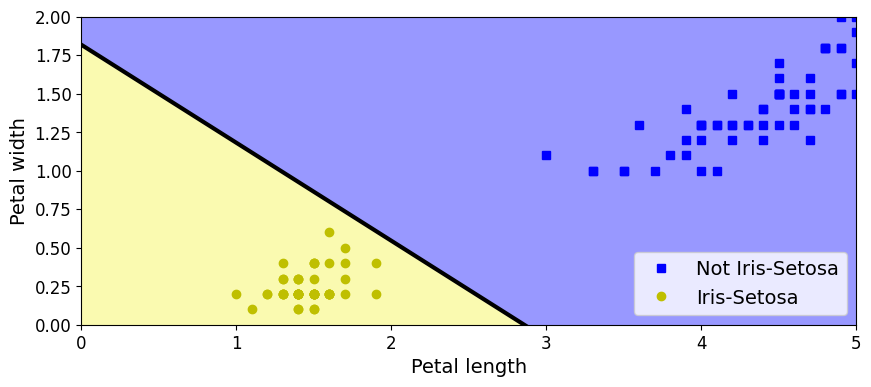

In [ ]:
# Plotting prediction of Iris-Setosa vs Not Iris-Setosa

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# meshgrid function is used to create a rectangular grid out of two given
# one-dimensional arrays representing the Cartesian indexing or Matrix indexing

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# ravel returns contiguous flattened array
# (1D array with all the input-array elements and with the same type as it)

X_new = np.c_[x0.ravel(), x1.ravel()] # Translates slice objects to concatenation along the second axis.
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

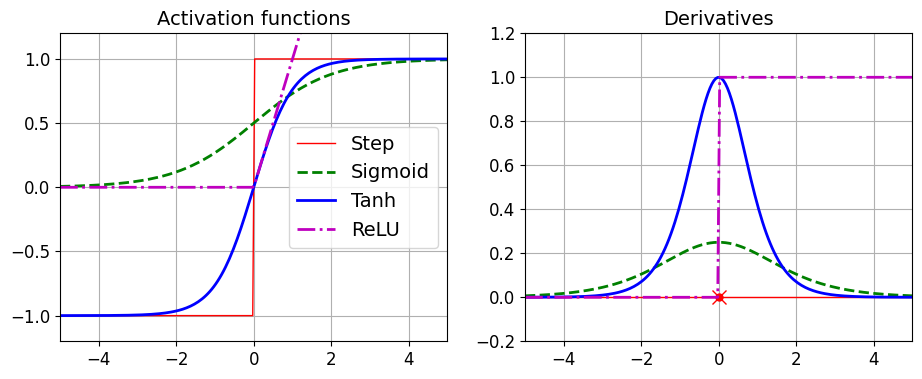

In [ ]:
# plotting the Activation functions and their derivatives

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# first plot

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# second plot

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [ ]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    a = activation(x1 + x2 - 1.5)
    b = activation(x1 + x2 - 0.5)
    return activation(-a + b - 0.5)

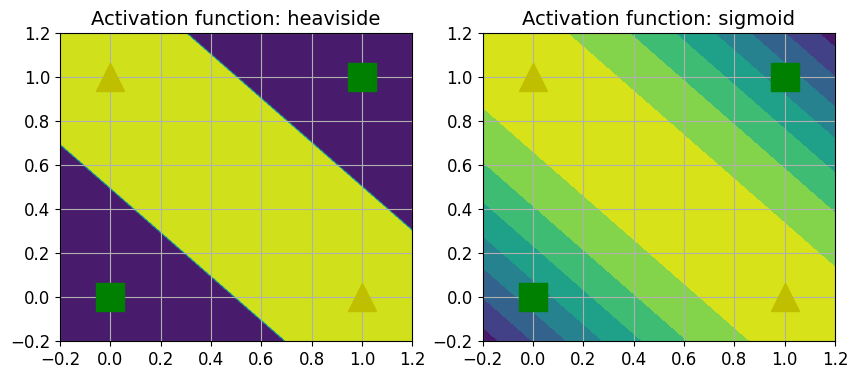

In [ ]:
# plotting the Heaviside and Sigmoid function

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

# first plot

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

# second plot

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [ ]:
import numpy as np
a = np.exp([0.4, 0.3])
a/np.sum(a)

array([0.52497919, 0.47502081])

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [ ]:
np.exp([0.4, 0.3])

array([1.4918247 , 1.34985881])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
keras.__version__

'3.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:


For more infor: https://github.com/zalandoresearch/fashion-mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # sorting into test and train set

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape # checking the shape of the training set

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [ ]:
y_train[0]

np.uint8(4)

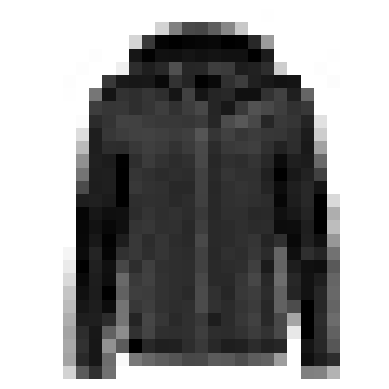

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
a = np.array([1,2,3])

In [ ]:
b = a[1:2]

In [ ]:
a

array([1, 2, 3])

In [ ]:
b[0] = 20

In [ ]:
a

array([ 1, 20,  3])

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

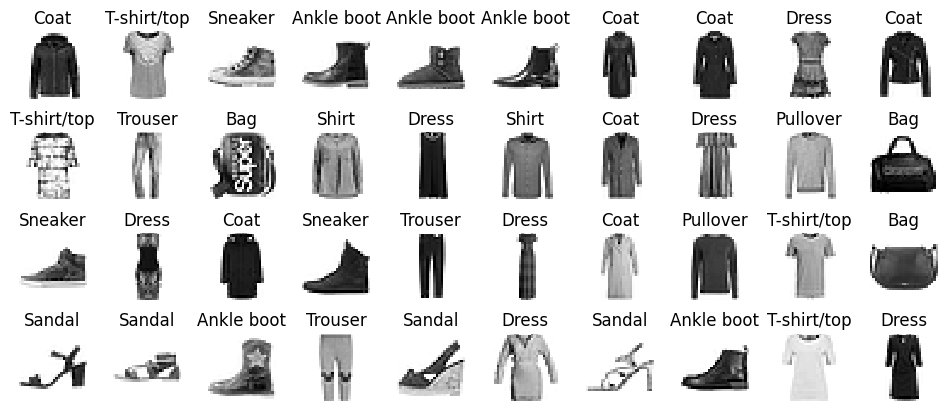

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Creating a classification MLP with Keras' Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten layer
model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def softmax(arr):
    pos = np.exp(arr)
    return pos/np.sum(pos)

In [ ]:
softmax([50,0.5,-12])

array([1.00000000e+00, 3.17997090e-22, 1.18506486e-27])

**Why do we need clear_session?**

It is useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. EVentually models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

In [ ]:
np.log(10)

np.float64(2.302585092994046)

In [ ]:
from numpy import log10
def my_cross_entropy(actual, predicted):
    return -np.dot(actual, log10(predicted))

def binary_cross_entropy(actual, predicted):
    return my_cross_entropy([actual, 1-actual], [predicted, 1-predicted])

In [ ]:
binary_cross_entropy(0.01, 0.99)

np.float64(1.980043648054024)

In [ ]:
binary_cross_entropy(0.01, 0.01)

np.float64(0.024321157348425586)

In [ ]:
binary_cross_entropy(0.02, 0.01)

np.float64(0.044277509294401086)

In [ ]:
binary_cross_entropy(0.9, 0.9)

np.float64(0.14118174150460758)

In [ ]:
binary_cross_entropy(0.9, 0.1)

np.float64(0.9045757490560675)

In [ ]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [ ]:
# Better way of doing it

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers # viewing the layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model.summary() # viewing the summary of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

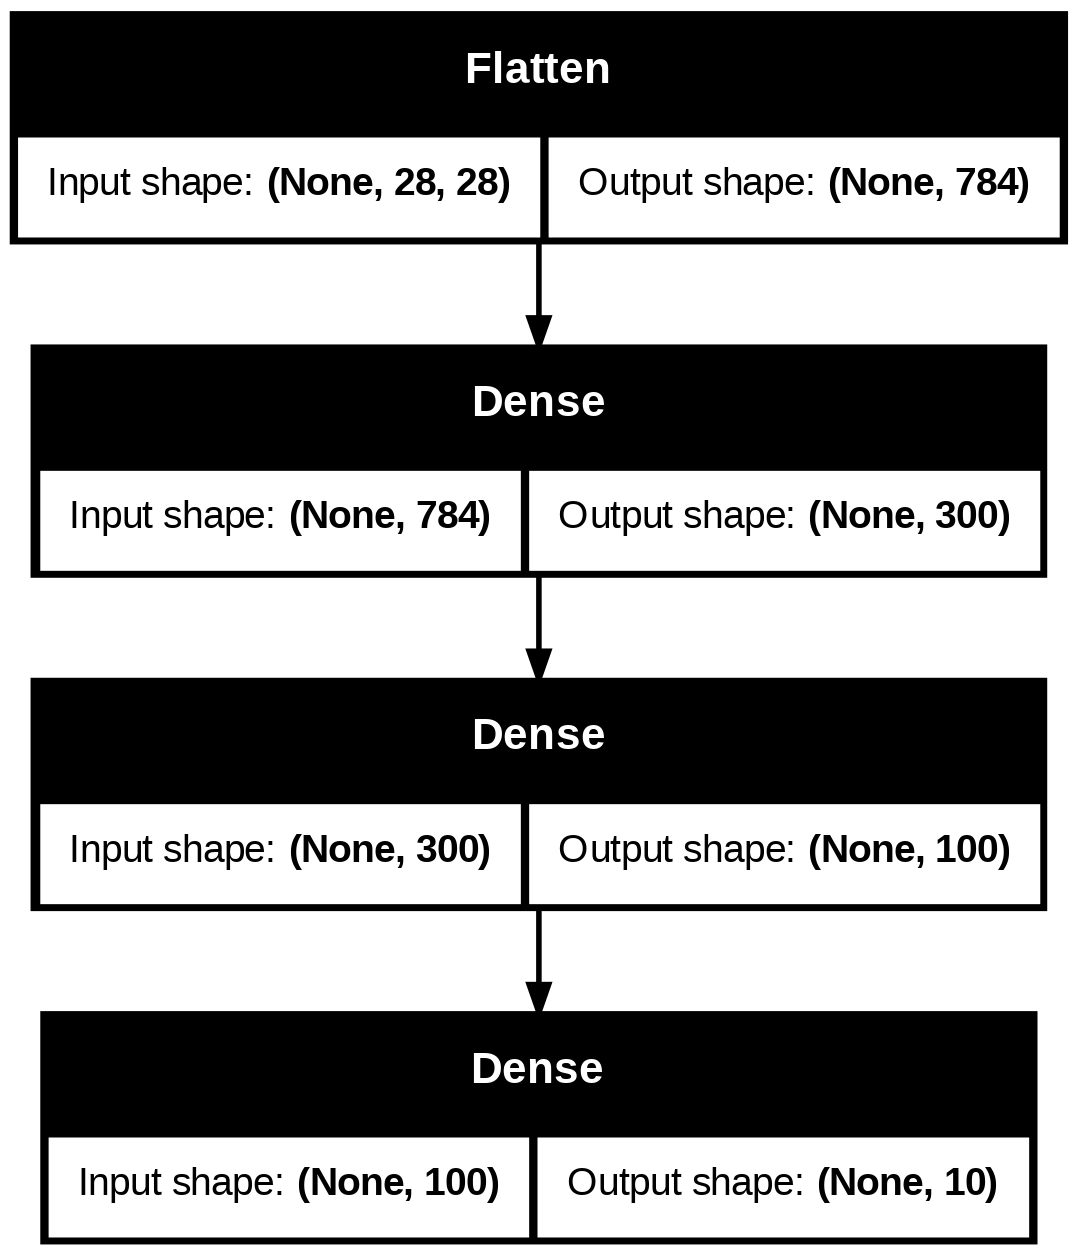

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1] # first layer
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1 # checking if the layer is hidden

True

In [ ]:
weights, biases = hidden1.get_weights() # getting the weights and biases

In [ ]:
weights # checking the weights

array([[ 0.06891395,  0.00397312, -0.01845968, ..., -0.01301141,
         0.02891089,  0.07027954],
       [-0.01711712,  0.05578154,  0.05339402, ..., -0.02432206,
         0.04790849,  0.01271512],
       [-0.06038328,  0.01519423, -0.00758758, ..., -0.06846865,
         0.01428635,  0.05785653],
       ...,
       [-0.04191882, -0.03566996,  0.01886955, ..., -0.01969031,
        -0.01131425,  0.00297741],
       [ 0.03309838,  0.02922437,  0.01733074, ...,  0.06634249,
         0.00162035, -0.03628822],
       [ 0.0614811 ,  0.00908922,  0.05602235, ...,  0.05454217,
         0.0341894 , -0.04386782]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases # checking the biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
res = tf.keras.utils.to_categorical([1, 2, 0, 4])

In [ ]:
res

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
np.argmax(res, axis=1)

array([1, 2, 0, 4])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
# Compiling the model we created

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # fitting the model to training data

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6693 - loss: 0.9981 - val_accuracy: 0.8224 - val_loss: 0.5171
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8248 - loss: 0.5019 - val_accuracy: 0.8472 - val_loss: 0.4470
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8414 - loss: 0.4475 - val_accuracy: 0.8570 - val_loss: 0.4154
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8530 - loss: 0.4174 - val_accuracy: 0.8634 - val_loss: 0.3953
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8599 - loss: 0.3960 - val_accuracy: 0.8682 - val_loss: 0.3786
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8644 - loss: 0.3791 - val_accuracy: 0.8720 - val_loss: 0.3673
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8702 - loss: 0.3651 - val_accuracy: 0.8728 - val_loss: 0.3588
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8755 - loss: 0.35

In [ ]:
history.params # getting the param history

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch) # epoch history

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys() # printing the history keys

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

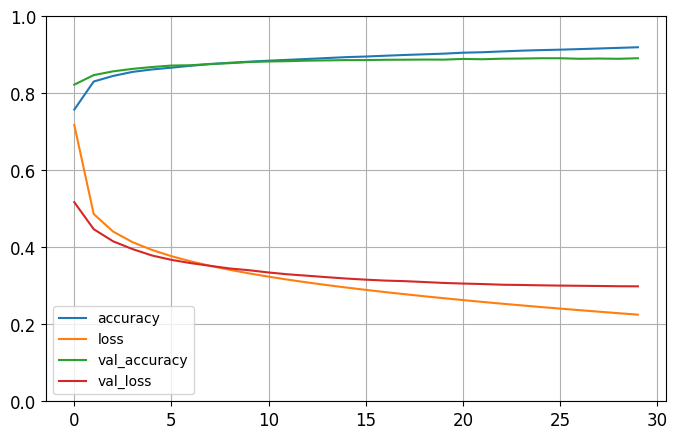

In [ ]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [ ]:
model.evaluate(X_test, y_test) # Evaluating the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8801 - loss: 0.3403


[0.33568239212036133, 0.881600022315979]

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# predicting first 3 elements

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

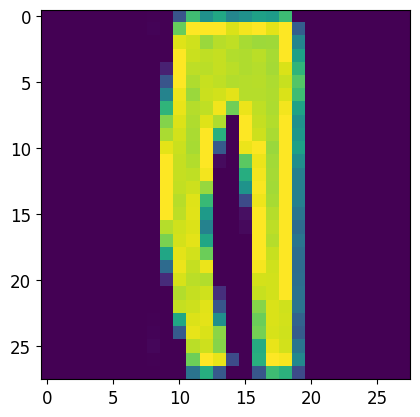

In [ ]:
plt.imshow(X_new[2])

In [ ]:
np.argmax(y_proba.round(2), axis=1)

array([9, 2, 1])

In [ ]:
# predicting the class of these 3 elements

y_pred = np.argmax(model.predict(X_new), axis=-1) # Use np.argmax to get predicted classes
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred] # getting the class names of the predicted elements

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3] # evaluating the prediction by matching with y_test
y_new

array([9, 2, 1], dtype=uint8)

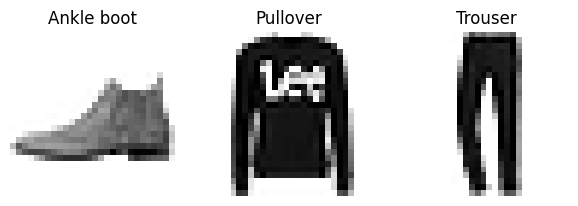

In [ ]:
# Plotting the predicted elements

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing() # loading the California Housing dataset

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # test and train
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) # training and validation

# Using the StandardScaler to scale the dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [ ]:
np.random.seed(42) # generating random see
tf.random.set_seed(42) # setting random seed
from tensorflow import keras

In [ ]:
# Creating the model using the Sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # compiling the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) # fit the model
mse_test = model.evaluate(X_test, y_test) # evaluating
X_new = X_test[:3]
y_pred = model.predict(X_new) # predicting

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1892 - val_loss: 0.8525
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8659 - val_loss: 0.7012
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7530 - val_loss: 0.6456
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7053 - val_loss: 0.6069
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6679 - val_loss: 0.5730
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6364 - val_loss: 0.5508
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6093 - val_loss: 0.5286
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5861 - val_loss: 0.5068
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5658 - val_loss: 0.4961
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5480 - val_loss: 0.4821
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5327 - val_loss: 0.4713
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [ ]:
# Creating the model using the Sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
# Use learning_rate instead of lr
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # compiling the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) # fit the model
mse_test = model.evaluate(X_test, y_test) #This line was missing causing the error

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9620 - val_loss: 0.9355
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9341 - val_loss: 0.7198
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7742 - val_loss: 0.6474
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7108 - val_loss: 0.6050
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6657 - val_loss: 0.5711
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6297 - val_loss: 0.5427
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5994 - val_loss: 0.5185
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5734 - val_loss: 0.4983
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5517 - val_loss: 0.4815
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5343 - val_loss: 0.4677
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5201 - val_loss: 0.4563
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if any).

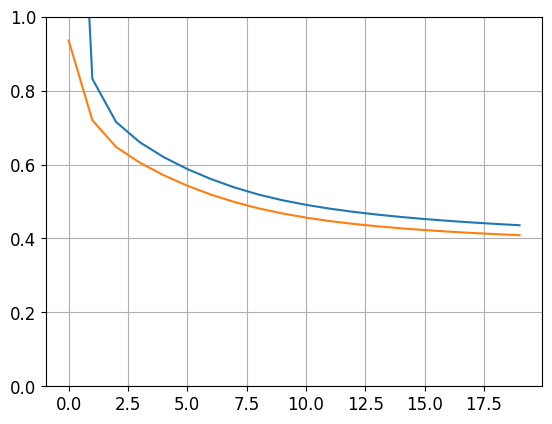

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting y-axis limit
plt.show()

In [ ]:
y_pred # printing the predictions

array([[0.67329895],
       [1.6547471 ],
       [3.3440351 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
l = keras.layers.Dense(30, activation="relu")

In [ ]:
import math
def f(power):
    def f1(y):
        return math.pow(y, power)
    return f1

In [ ]:
nf = f(3)

In [ ]:
nf(20)

8000.0

In [ ]:
nf(30)

27000.0

In [ ]:
a = np.array([1,1])

In [ ]:
b = np.array([2,2])

In [ ]:
np.concatenate([a, b])

array([1, 1, 2, 2])

In [ ]:
keras.layers.concatenate([a, b])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 1, 2, 2])>

In [ ]:
# Defining the layers
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) # concatenate inputs
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

# Compile the model, using learning_rate instead of lr
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Fit and evaluate the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.3094 - val_loss: 0.8962
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7386 - val_loss: 0.6255
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6487 - val_loss: 0.5774
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6003 - val_loss: 0.5351
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5645 - val_loss: 0.5062
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5373 - val_loss: 0.4845
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5163 - val_loss: 0.4650
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4995 - val_loss: 0.4494
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4858 - val_loss: 0.4371
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4745 - val_loss: 0.4286
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4649 - val_loss: 0.4208
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [ ]:
y_pred = model.predict(X_test) # predict using the model

106/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(32, 8))
  warnings.warn(msg)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred

array([[0.72086525],
       [1.6980495 ],
       [3.39773   ],
       ...,
       [1.3596642 ],
       [2.5629854 ],
       [3.8218231 ]], dtype=float32)

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# creating the model using different number of layers

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # concatenate inputs
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
[1,2,3,4][2:]

[3, 4]

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # compile the model, use learning_rate instead of lr

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6365 - val_loss: 1.1974
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8921 - val_loss: 0.6977
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7216 - val_loss: 0.6344
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6572 - val_loss: 0.6148
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6160 - val_loss: 0.5938
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5849 - val_loss: 0.5518
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5602 - val_loss: 0.5185
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5403 - val_loss: 0.4921
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5241 - val_loss: 0.4704
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5109 - val_loss: 0.4533
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4999 - val_loss: 0.4403
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Adding an auxiliary output for regularization:

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # concatenate the inputs
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # aux output for regularization
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # compile the model, use learning_rate instead of lr

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])) # fit the model

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 5.8009 - loss: 3.5370 - main_output_loss: 3.2855 - val_aux_output_loss: 5.1554 - val_loss: 1.4840 - val_main_output_loss: 1.0758
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 3.8173 - loss: 1.1993 - main_output_loss: 0.9084 - val_aux_output_loss: 5.5825 - val_loss: 1.2742 - val_main_output_loss: 0.7951
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 2.4223 - loss: 0.9023 - main_output_loss: 0.7334 - val_aux_output_loss: 5.8319 - val_loss: 1.1514 - val_main_output_loss: 0.6309
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.8762 - loss: 0.7879 - main_output_loss: 0.6669 - val_aux_output_loss: 5.5001 - val_loss: 1.0795 - val_main_output_loss: 0.5880
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.6803 - loss: 0.7318 - main_output_loss: 0.6264 - val_aux_output_loss: 5.1783 - val_loss: 1.0280 - val_main_output_loss: 0.5665


In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B]) # predicting using aux layer

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 1.0762 - loss: 0.4909 - main_output_loss: 0.4259
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


# The subclassing API

In [ ]:
# Creating the WideAndDeepModel using subclassing

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
# Compiling, evaluating, and predicting the model

# Use learning_rate instead of lr and provide loss and loss_weights for each output
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7986 - mse_loss: 6.5043 - val_loss: 1.5553 - val_mse_loss: 6.4050
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1692 - mse_loss: 3.6395 - val_loss: 1.3472 - val_mse_loss: 7.0431
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8901 - mse_loss: 2.2885 - val_loss: 1.2832 - val_mse_loss: 7.0862
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7809 - mse_loss: 1.7470 - val_loss: 1.1769 - val_mse_loss: 6.4882
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7164 - mse_loss: 1.5025 - val_loss: 1.0508 - val_mse_loss: 5.5883
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6707 - mse_loss: 1.3695 - val_loss: 0.9259 - val_mse_loss: 4.6358
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6355 - mse_loss: 1.2844 - val_loss: 0.8167 - val_mse_loss: 3.7576
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6082 - mse_loss: 1.2235 - val_loss: 0.7285

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
model = WideAndDeepModel(30, activation="relu") # creating an instance of the WideAndDeepModel

# Saving and Restoring

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# creating a model to demonstrate saving and restoring

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # Use learning_rate instead of lr

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) # fit the model
mse_test = model.evaluate(X_test, y_test) # evalutate the model

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9721 - val_loss: 1.1923
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8688 - val_loss: 1.0156
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7193 - val_loss: 0.6138
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6489 - val_loss: 0.5875
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6016 - val_loss: 0.5413
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5656 - val_loss: 0.5179
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5372 - val_loss: 0.5065
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5145 - val_loss: 0.4937
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4960 - val_loss: 0.4827
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4807 - val_loss: 0.4740
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4425


In [ ]:
model.save("my_keras_model.h5") # Saving the model

In [ ]:
!strings my_keras_model.h5

TREE
HEAP
model_weights
optimizer_weights
keras_version
backend
model_config
training_config
TREE
HEAP
layer_names
GCOL
3.8.0
tensorflow
{"class_name": "Sequential", "config": {"name": "sequential_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"class_name": "InputLayer", "config": {"batch_shape": [null, 8], "dtype": "float32", "sparse": false, "name": "input_layer_4"}}, {"class_name": "Dense", "config": {"name": "dense_23", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, 

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # Use learning_rate instead of lr
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) # fit the model
mse_test = model.evaluate(X_test, y_test) # evalutate the model
model.save("my_keras_model.h5") # Saving the model

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4682 - val_loss: 0.4674
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4579 - val_loss: 0.4603
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4492 - val_loss: 0.4548
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4419 - val_loss: 0.4493
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4355 - val_loss: 0.4440
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4300 - val_loss: 0.4395
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4251 - val_loss: 0.4351
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4210 - val_loss: 0.4323
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4174 - val_loss: 0.4296
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4142 - val_loss: 0.4272
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3933


In [ ]:
X_new = X_test[:3]  # Use the California housing test data
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
model.save_weights("my_keras_weights.weights.h5") # saving the weights

In [ ]:
# The original code was trying to load weights from a file with a ".ckpt" extension,
# which is not supported by Keras 3.
# model.load_weights("my_keras_weights.ckpt")

# Change the file extension to ".h5", which is the format used by `model.save_weights`
# Also modify the filename to include the weights extension.
model.load_weights("my_keras_weights.weights.h5") # loading the saved weights

# Using Callbacks during Training

In [ ]:
# Clearing previous session and
# generating random seed and setting
# the random seed

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Defining the model to demostrate callbacks

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # saving the best model checkpoint
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb]) # using the callback
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3058

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2781 - val_loss: 0.8230
Epoch 2/10
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8442

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8429 - val_loss: 0.6809
Epoch 3/10
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7377

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7361 - val_loss: 0.6091
Epoch 4/10
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6755

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6727 - val_loss: 0.5612
Epoch 5/10
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6243

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6228 - val_loss: 0.5269
Epoch 6/10
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5854

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5834 - val_loss: 0.5031
Epoch 7/10
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5529

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5520 - val_loss: 0.4865
Epoch 8/10
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5281

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5267 - val_loss: 0.4757
Epoch 9/10
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5081

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5062 - val_loss: 0.4684
Epoch 10/10
332/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4924

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4895 - val_loss: 0.4640


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4503


In [ ]:
!ls my_keras_model.h5

my_keras_model.h5


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True) # saving early stopping
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # using the callback for checkpoint, and early stopping
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
329/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4788

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4758 - val_loss: 0.4605
Epoch 2/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4656

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4646 - val_loss: 0.4582
Epoch 3/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4561

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4555 - val_loss: 0.4560
Epoch 4/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4483

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4477 - val_loss: 0.4541
Epoch 5/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4410

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4409 - val_loss: 0.4521
Epoch 6/100
337/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4367

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4349 - val_loss: 0.4495
Epoch 7/100
336/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4314

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4296 - val_loss: 0.4469
Epoch 8/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4255

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4249 - val_loss: 0.4441
Epoch 9/100
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4220

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4207 - val_loss: 0.4410
Epoch 10/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4174

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4170 - val_loss: 0.4386
Epoch 11/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4143

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4135 - val_loss: 0.4366
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4104

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4104 - val_loss: 0.4335
Epoch 13/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4080

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4074 - val_loss: 0.4304
Epoch 14/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4051

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4047 - val_loss: 0.4279
Epoch 15/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4032

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4022 - val_loss: 0.4259
Epoch 16/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4004

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3999 - val_loss: 0.4230
Epoch 17/100
340/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3990

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3978 - val_loss: 0.4213
Epoch 18/100
331/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3975

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3958 - val_loss: 0.4184
Epoch 19/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3943

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3939 - val_loss: 0.4168
Epoch 20/100
338/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3935

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3922 - val_loss: 0.4144
Epoch 21/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3913

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3905 - val_loss: 0.4129
Epoch 22/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3889 - val_loss: 0.4133
Epoch 23/100
337/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3887

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3874 - val_loss: 0.4085
Epoch 24/100
333/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3875

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3860 - val_loss: 0.4083
Epoch 25/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3852

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3846 - val_loss: 0.4069
Epoch 26/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3835

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3833 - val_loss: 0.4016
Epoch 27/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3821 - val_loss: 0.4019
Epoch 28/100
338/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3821

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3809 - val_loss: 0.3979
Epoch 29/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3802

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3797 - val_loss: 0.3976
Epoch 30/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3791

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3786 - val_loss: 0.3969
Epoch 31/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3779

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3776 - val_loss: 0.3925
Epoch 32/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3766 - val_loss: 0.3938
Epoch 33/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - val_loss: 0.3944
Epoch 34/100
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3755

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3746 - val_loss: 0.3911
Epoch 35/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3737 - val_loss: 0.3928
Epoch 36/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3733

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3728 - val_loss: 0.3901
Epoch 37/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3720 - val_loss: 0.3910
Epoch 38/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3712 - val_loss: 0.3920
Epoch 39/100
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3714

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3704 - val_loss: 0.3901
Epoch 40/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - val_loss: 0.3939
Epoch 41/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3689 - val_loss: 0.3984
Epoch 42/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3682 - val_loss: 0.3996
Epoch 43/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3675 - val_loss: 0.4055
Epoch 44/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3668 - val_loss: 0.4070
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3626


In [ ]:
mse_test = model.evaluate(X_valid, y_valid)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3660


In [ ]:
# Creating custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\n SG :: val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback() # calling the custom callback
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb]) # fitting the model using the custom callback

Epoch 1/5
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3701
 SG :: val/train: 1.10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3696 - val_loss: 0.3939
Epoch 2/5
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3699
 SG :: val/train: 1.12
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3689 - val_loss: 0.3984
Epoch 3/5
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3687
 SG :: val/train: 1.12
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3682 - val_loss: 0.3996
Epoch 4/5
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3677
 SG :: val/train: 1.14
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3675 - val_loss: 0.4055
Epoch 5/5
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3673
 SG :: val/train: 1.15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3668 - val_loss: 0.4070


# TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs") # defining root log directory

In [ ]:
# generate a subdirectory path based on the current date
# and time so that it’s different at every run

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2025_04_18-14_31_38'

In [ ]:
!ls my_logs/run_2020_07_19-15_16_22/train

ls: cannot access 'my_logs/run_2020_07_19-15_16_22/train': No such file or directory


In [ ]:
!pwd

/content


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# defining the model to demostrate Tensorboard functionality

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# Use learning_rate instead of lr
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # compiling the model

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) # Using Tensorboard callback
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2858 - val_loss: 1.0807
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0018 - val_loss: 0.7729
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7901 - val_loss: 0.6790
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7208 - val_loss: 0.6274
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6774 - val_loss: 0.5918
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6423 - val_loss: 0.5648
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6124 - val_loss: 0.5390
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5870 - val_loss: 0.5198
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5650 - val_loss: 0.5019
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5456 - val_loss: 0.4869
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5285 - val_loss: 0.4734
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4293 - val_loss: 0.3900
Epoch 24/30
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4262

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4256 - val_loss: 0.3869
Epoch 25/30
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4223

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4222 - val_loss: 0.3841
Epoch 26/30
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4203

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4191 - val_loss: 0.3818
Epoch 27/30
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4164

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4161 - val_loss: 0.3798
Epoch 28/30
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4139

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4133 - val_loss: 0.3779
Epoch 29/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4108

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4106 - val_loss: 0.3761
Epoch 30/30
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4082

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4080 - val_loss: 0.3744


To start the TensorBoard server, open a terminal and type below command in terminal

```bash
/usr/local/anaconda/envs/tensorflow2/bin/tensorboard --logdir=./my_logs --port=4049 --bind_all
```

If you are getting error that port is already in use, then please use any other port in the range of 4040 to 4140. Once TensorBoard server is started then please go to below url to access it

http://your_web_console:your_port_number

Replace *your_web_console* with your CloudxLab web console address. Say your console is on f.cloudxlab.com then *your_web_console* will be f.cloudxlab.com. *your_port_number* will be the port on which your TensorBoard server is running. Below is the fully qualified url for accessing your TensorBoard server

http://f.cloudxlab.com:4049


Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2025_04_18-14_32_20'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# running another model to compare

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2) # calling the Tensorboard using the second model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8553 - val_loss: 44.4203
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4922 - val_loss: 5.7257
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4662 - val_loss: 0.5796
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4103

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4102 - val_loss: 0.3623
Epoch 5/30
337/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3977

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3956 - val_loss: 0.3565
Epoch 6/30
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3825

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3817 - val_loss: 0.3500
Epoch 7/30
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3691

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3686 - val_loss: 0.3468
Epoch 8/30
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3614

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3608 - val_loss: 0.3429
Epoch 9/30
335/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3569

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3554 - val_loss: 0.3390
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3500 - val_loss: 0.3429
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3451 - val_loss: 0.3400
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3393 - val_loss: 0.3424
Epoch 13/30
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3342

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3341 - val_loss: 0.3354
Epoch 14/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3287

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3285 - val_loss: 0.3301
Epoch 15/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3246 - val_loss: 0.3343
Epoch 16/30
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3204

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3200 - val_loss: 0.3286
Epoch 17/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3160

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3158 - val_loss: 0.3169
Epoch 18/30
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3132

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3131 - val_loss: 0.3159
Epoch 19/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3108 - val_loss: 0.3423
Epoch 20/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3082 - val_loss: 0.3210
Epoch 21/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3060 - val_loss: 0.3366
Epoch 22/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3039 - val_loss: 0.3445
Epoch 23/30
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3037

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3037 - val_loss: 0.3074
Epoch 24/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3002 - val_loss: 0.3448
Epoch 25/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2996 - val_loss: 0.7235
Epoch 26/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3022 - val_loss: 2.0748
Epoch 27/30
340/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3004

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2998 - val_loss: 0.3028
Epoch 28/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2959

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2959 - val_loss: 0.2974
Epoch 29/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2941 - val_loss: 0.3023
Epoch 30/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2924 - val_loss: 0.3835


Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.src.callbacks.tensorboard:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None)
    Initialize self.  See help(type(self)) for accurate signature.

